#### Random Sample Imputation

In [33]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [35]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [36]:
df['Age'].isnull().sum()

177

In [37]:
## total null values in age column=177
##here 177 random values are generated

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [38]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [44]:

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]##  creating a new feature
    ## droping NAN values and the random sample values are
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas needs to have same indexes in order merge the random sample in place of original data
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df['variable'].isnull(),variable+"_random"]=random_sample

In [45]:
median=df.Age.median()
median

28.0

In [46]:
impute_nan(df,'Age',median)

KeyError: 'variable'

In [47]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

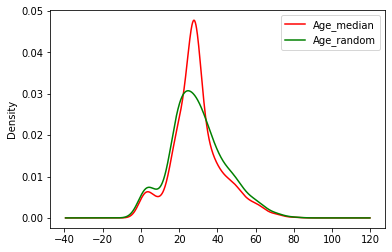

In [49]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['Age_median'].plot(kind='kde',ax=ax,color='red')

df['Age_random'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

####but in every situation randomness wont work

## Capturing Nan values with a new feature

it works well when the data are not missing completely at random

In [50]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,NaN
889,1,26.0,30.0000,26.0,26.0


In [51]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [53]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [54]:
df.Age.mean()

29.69911764705882

In [55]:
df.Age.median()

28.0

In [56]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [57]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


### End of Distribution imputation

In [58]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot: >

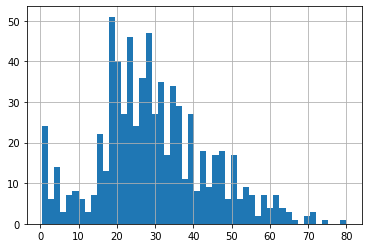

In [59]:
df.Age.hist(bins=50)

In [60]:
extreme=df.Age.mean()+3*df.Age.std()

C:\Users\Pallavi\anaconda3dekstop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age'>

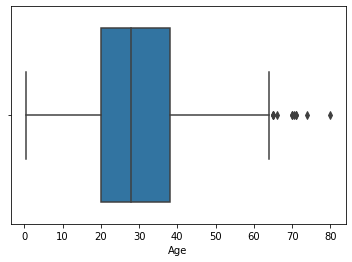

In [61]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [62]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [63]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [64]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot: >

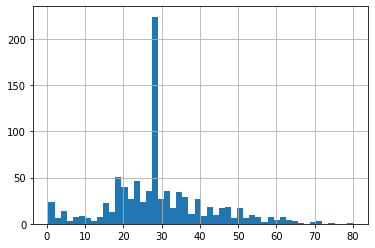

In [65]:
df['Age'].hist(bins=50)

<AxesSubplot: >

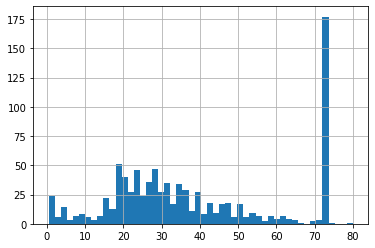

In [66]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\Pallavi\anaconda3dekstop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age_end_distribution'>

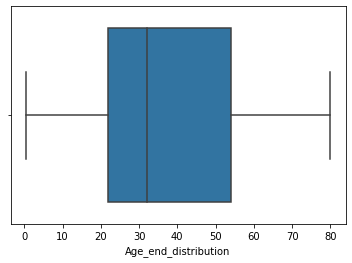

In [67]:
sns.boxplot('Age_end_distribution',data=df)

KeyError: 'Age_random'

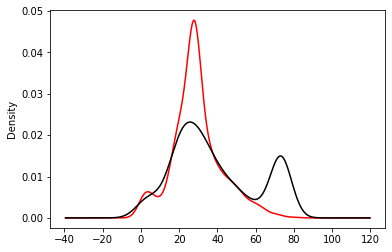

In [68]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['Age'].plot(kind='kde',ax=ax,color='red')
df['Age_end_distribution'].plot(kind='kde',ax=ax, color='black')
df['Age_random'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')